In [19]:
#pip install citipy
#Import Modules and keys
import os
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from citipy import citipy
from config import owm_key
from scipy import stats
import random
import json

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [24]:
#Majority of code in this cell from starter code for WeatherPy activity.  Previous code may not have
#provided an even distribution of latitudes and longitudes (they were really random cities selected
#from the citipy world city dictionary, so distributed based on cities in the citipy library, not 
#necessarily well-distributed)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"There are {len(cities)} cities in the list, let's request some weather data!")

There are 597 cities in the list, let's request some weather data!


In [25]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={owm_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng = []
temp = []
tempMax=[]
tempMin=[]
humidity = []
cloudiness = []
windspeed=[]
country=[]
cityFound=[]
i=1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        print(f"Requesting city {i} of {cityNum}: {city}")
        response = requests.get(query_url + city).json()
        cityFound.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        tempMax.append(response['main']['temp_max'])
        tempMin.append(response['main']['temp_min'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        
    except: 
        print(f'Couldn\'t get all the data for {city}.  On to the next city...')
    i+=1
    
#After getting all the requests, put together a dataframe using a dictionary of lists
weather_dict = {
    "City": cityFound,
    'Country':country,
    "Lat": lat,
    'Lng':lng,
    "Temp_F": temp,
    'TempMax_F':tempMax,
    'TempMin_F':tempMin,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Windspeed':windspeed
}
randomWeather = pd.DataFrame(weather_dict)
#Save a copy of the requested weather data
randomWeather.to_csv(os.path.join('Output',f'WeatherData_{len(randomWeather)}.csv'))
randomWeather.head()
print(f'Successfully retrieved {len(randomWeather)} weather records and saved them to a dataframe (randomWeather).')

Requesting city 1 of 600: taolanaro
Couldn't get all the data for taolanaro.  On to the next city...
Requesting city 2 of 600: butaritari
Requesting city 3 of 600: rikitea
Requesting city 4 of 600: kapaa
Requesting city 5 of 600: north bend
Requesting city 6 of 600: mar del plata
Requesting city 7 of 600: thompson
Requesting city 8 of 600: sao filipe
Requesting city 9 of 600: manoharpur
Requesting city 10 of 600: burnie
Requesting city 11 of 600: aksu
Requesting city 12 of 600: lebu
Requesting city 13 of 600: sao jose da coroa grande
Requesting city 14 of 600: vila franca do campo
Requesting city 15 of 600: ponta do sol
Requesting city 16 of 600: port alfred
Requesting city 17 of 600: chokurdakh
Requesting city 18 of 600: jamestown
Requesting city 19 of 600: antofagasta
Requesting city 20 of 600: sola
Requesting city 21 of 600: phan rang
Couldn't get all the data for phan rang.  On to the next city...
Requesting city 22 of 600: naze
Requesting city 23 of 600: yellowknife
Requesting cit

Requesting city 200 of 600: pafos
Requesting city 201 of 600: souillac
Requesting city 202 of 600: itaueira
Requesting city 203 of 600: vestmannaeyjar
Requesting city 204 of 600: fortuna
Requesting city 205 of 600: laguna
Requesting city 206 of 600: akdepe
Requesting city 207 of 600: wahran
Couldn't get all the data for wahran.  On to the next city...
Requesting city 208 of 600: esperance
Requesting city 209 of 600: sorvag
Couldn't get all the data for sorvag.  On to the next city...
Requesting city 210 of 600: guaymas
Requesting city 211 of 600: qaqortoq
Requesting city 212 of 600: tiznit
Requesting city 213 of 600: alofi
Requesting city 214 of 600: ambon
Requesting city 215 of 600: clyde river
Requesting city 216 of 600: port-gentil
Requesting city 217 of 600: palapag
Requesting city 218 of 600: simbahan
Requesting city 219 of 600: niksar
Requesting city 220 of 600: balaipungut
Requesting city 221 of 600: seymchan
Requesting city 222 of 600: nueve de julio
Requesting city 223 of 600:

Requesting city 387 of 600: masuguru
Requesting city 388 of 600: camacha
Requesting city 389 of 600: san cristobal
Requesting city 390 of 600: hadejia
Requesting city 391 of 600: agva
Couldn't get all the data for agva.  On to the next city...
Requesting city 392 of 600: port hedland
Requesting city 393 of 600: dicamay
Requesting city 394 of 600: visnes
Requesting city 395 of 600: baiao
Requesting city 396 of 600: navalmoral de la mata
Requesting city 397 of 600: dingle
Requesting city 398 of 600: kamenka
Requesting city 399 of 600: marienburg
Requesting city 400 of 600: turbat
Requesting city 401 of 600: vostok
Requesting city 402 of 600: mitsamiouli
Requesting city 403 of 600: natal
Requesting city 404 of 600: khandyga
Requesting city 405 of 600: akyab
Requesting city 406 of 600: roma
Requesting city 407 of 600: abbotsford
Requesting city 408 of 600: gananoque
Requesting city 409 of 600: sukhobuzimskoye
Requesting city 410 of 600: adrar
Requesting city 411 of 600: amberieu-en-bugey
R

Requesting city 578 of 600: meulaboh
Requesting city 579 of 600: harer
Requesting city 580 of 600: harsin
Requesting city 581 of 600: chapais
Requesting city 582 of 600: alice springs
Requesting city 583 of 600: upington
Requesting city 584 of 600: quatre cocos
Requesting city 585 of 600: broken hill
Requesting city 586 of 600: ubatuba
Requesting city 587 of 600: kerman
Requesting city 588 of 600: bhuj
Requesting city 589 of 600: beocin
Requesting city 590 of 600: estelle
Requesting city 591 of 600: alnavar
Requesting city 592 of 600: mullaitivu
Couldn't get all the data for mullaitivu.  On to the next city...
Requesting city 593 of 600: yerbogachen
Requesting city 594 of 600: kampene
Requesting city 595 of 600: gwanda
Requesting city 596 of 600: raha
Requesting city 597 of 600: cobija
Successfully retrieved 549 weather records and saved them to a dataframe (randomWeather).


In [27]:
#Run this cell for a copy of a saved CSV file from a previous set of requests.
#This way you'll generate the same figures as the ones from the initial set of calls (750 requests, 715 responses)
randomWeather=pd.read_csv(os.path.join('Output','WeatherData_549.csv'))
randomWeather=randomWeather[['City','Country','Lat','Lng','Temp_F','TempMin_F','TempMax_F','Humidity','Cloudiness','Windspeed']]
randomWeather.head()

,City,Country,Lat,Lng,Temp_F,TempMin_F,TempMax_F,Humidity,Cloudiness,Windspeed
0,Butaritari,KI,3.0707,172.7902,81.82,81.82,81.82,79,100,18.03
1,Rikitea,PF,-23.1203,-134.9692,77.81,77.81,77.81,67,12,9.48
2,Kapaa,US,22.0752,-159.3190,63.61,63.00,64.40,77,40,5.75
3,North Bend,US,43.4065,-124.2243,41.77,39.99,42.80,87,90,5.14
4,Mar del Plata,AR,-38.0023,-57.5575,60.03,57.99,62.01,72,75,11.50


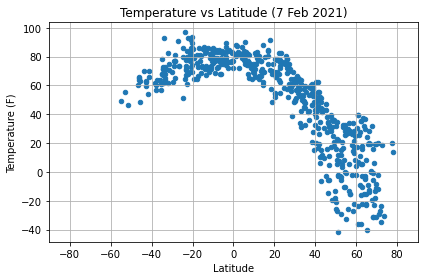

Temperature appears to increase closer to the equator.  Temperature also appears to be
cooler in the Northern Hemisphere as it is currently winter in the Northern Hemisphere
(February 2021).  There appear to be more data points in the Northern Hemisphere,
but this may be because there is more land mass in the Northern Hemisphere, so there are
more places to put weather stations than in the Southern Hemisphere.


In [28]:
#the following cells generate a series of plots, with commentary on the weather data
#this was originally run on 7 February 2021, so if the seasons have changed, some of the
#conclusions and discussion may have also changed!
randomWeather.plot(kind='scatter',y='Temp_F',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.title('Temperature vs Latitude (7 Feb 2021)')
plt.tight_layout()
plt.savefig(os.path.join("Output","TempVsLat.png"),facecolor='white', transparent=False)
plt.show()
print(f"Temperature appears to increase closer to the equator.  Temperature also appears to be" \
      f"\ncooler in the Northern Hemisphere as it is currently winter in the Northern Hemisphere" \
      f"\n(February 2021).  There appear to be more data points in the Northern Hemisphere," \
      f"\nbut this may be because there is more land mass in the Northern Hemisphere, so there are"\
      f"\nmore places to put weather stations than in the Southern Hemisphere.")

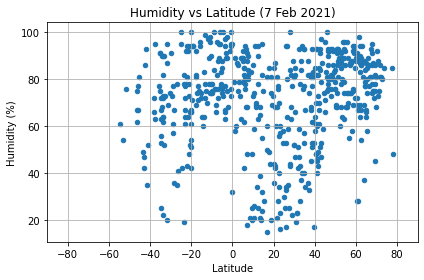

Again, there are more data points in the Northern Hemisphere compared to the
Southern Hemisphere, likely due to more land mass up North.  Humidity appears
to be lower near the equator, which may be due to dryer areas like the
southwest United States and the Sahara Desert in Africa and the Middle East.


In [29]:
randomWeather.plot(kind='scatter',y='Humidity',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.title('Humidity vs Latitude (7 Feb 2021)')
plt.tight_layout()
plt.savefig(os.path.join("Output","HumidityVsLat.png"),facecolor='white', transparent=False)
plt.show()
print(f"Again, there are more data points in the Northern Hemisphere compared to the" \
      f"\nSouthern Hemisphere, likely due to more land mass up North.  Humidity appears" \
      f"\nto be lower near the equator, which may be due to dryer areas like the" \
      f"\nsouthwest United States and the Sahara Desert in Africa and the Middle East.")



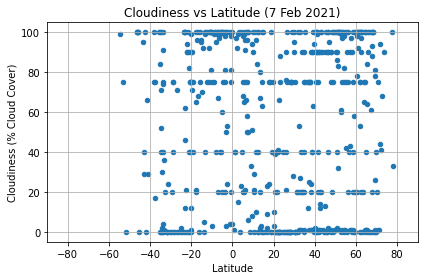

Cloud coverage appears to vary at all latitudes.  It also appears there may
be some variations in data sources, as many of the cloudiness reports seem
to fall along 0%, 20%, 40%, 75%, 90%, and 100%.  Perhaps there are different
standards for measuring the percentage of cloud cover.  The cloud coverage
does not appear to have a strong correlation to latitude.


In [30]:
randomWeather.plot(kind='scatter',y='Cloudiness', x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Cloudiness (% Cloud Cover)')
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.title('Cloudiness vs Latitude (7 Feb 2021)')
plt.tight_layout()
plt.savefig(os.path.join("Output","CloudsVsLat.png"),facecolor='white', transparent=False)
plt.show()
print(f"Cloud coverage appears to vary at all latitudes.  It also appears there may" \
      f"\nbe some variations in data sources, as many of the cloudiness reports seem" \
      f"\nto fall along 0%, 20%, 40%, 75%, 90%, and 100%.  Perhaps there are different" \
      f"\nstandards for measuring the percentage of cloud cover.  The cloud coverage" \
      f"\ndoes not appear to have a strong correlation to latitude.")


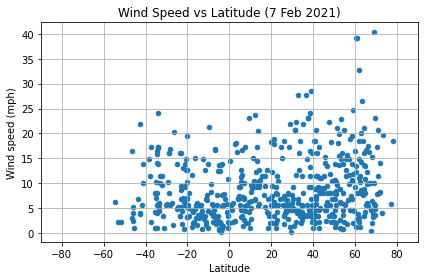

Wind speed appears to be somewhat higher in the Northern Hemisphere than
in the Southern Hemisphere, and appears to have lower values at the equator.
As this data was pulled during February 2021, it's possible that the wind
speed is higher in the Northern Hemisphere because it's currently winter in
the Northern Hemisphere.


In [31]:
randomWeather.plot(kind='scatter',y='Windspeed',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Wind speed (mph)')
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.title('Wind Speed vs Latitude (7 Feb 2021)')
plt.tight_layout()
plt.savefig(os.path.join("Output","WindVsLat.png"),facecolor='white', transparent=False)
plt.show()
print(f"Wind speed appears to be somewhat higher in the Northern Hemisphere than" \
      f"\nin the Southern Hemisphere, and appears to have lower values at the equator." \
      f"\nAs this data was pulled during February 2021, it's possible that the wind" \
      f"\nspeed is higher in the Northern Hemisphere because it's currently winter in" \
      f"\nthe Northern Hemisphere.")

In [32]:
#Make two new dataframes, one for northern hemisphere(Lat>=0) and southern hemisphere (Lat<0)
weatherNH=randomWeather.loc[randomWeather['Lat']>=0]
weatherSH=randomWeather.loc[randomWeather['Lat']<0]

### Northern and Southern Hemispheres: Temperature (F)

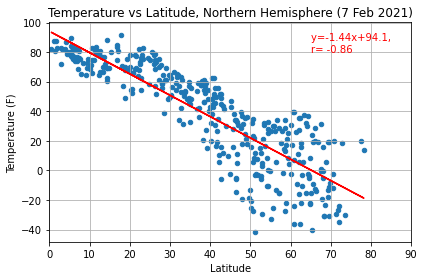

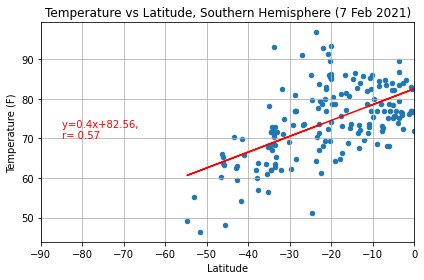

There is a very strong negative correlation between temperature and latitude in the Northern
Hemisphere.  The more the latitude increases (farther north), the more the temperature drops.
There is a visible trend along the line of best fit for temperature and latitude in the
Southern Hemisphere, but not as strong of a correlation.  This may be because the current season
in the Southern Hemisphere is summer, so the highest temperatures on earth are expected to be south
of the equator, not precisely located on the equator.and Australia can have warmer weather in the 
summer, even though the continent is relatively far south.


In [33]:
weatherNH.plot(kind='scatter',y='Temp_F',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.xlim(0,90)
plt.title('Temperature vs Latitude, Northern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherNH['Lat'], weatherNH['Temp_F'])
fit = slope * weatherNH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(65,80),fontsize=10,color="red",xytext=(65,80))
plt.plot(weatherNH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","TempVsLatNH.png"),facecolor='white', transparent=False)
plt.show()

weatherSH.plot(kind='scatter',y='Temp_F',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.xlim(-90,0)
plt.title('Temperature vs Latitude, Southern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherSH['Lat'], weatherSH['Temp_F'])
fit = slope * weatherSH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(-90,70),fontsize=10,color="red",xytext=(-85,70))
plt.plot(weatherSH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","TempVsLatSH.png"),facecolor='white', transparent=False)
plt.show()
print(f"There is a very strong negative correlation between temperature and latitude in the Northern" \
     f"\nHemisphere.  The more the latitude increases (farther north), the more the temperature drops." \
     f"\nThere is a visible trend along the line of best fit for temperature and latitude in the" \
     f"\nSouthern Hemisphere, but not as strong of a correlation.  This may be because the current season" \
     f"\nin the Southern Hemisphere is summer, so the highest temperatures on earth are expected to be south" \
     f"\nof the equator, not precisely located on the equator.and Australia can have warmer weather in the " \
     f"\nsummer, even though the continent is relatively far south.")

### Northern and Southern Hemispheres: Humidity (%)

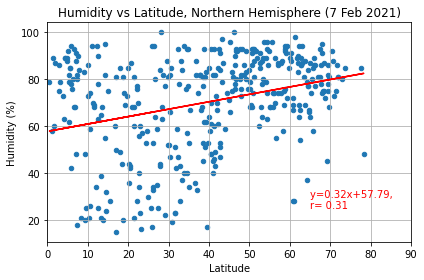

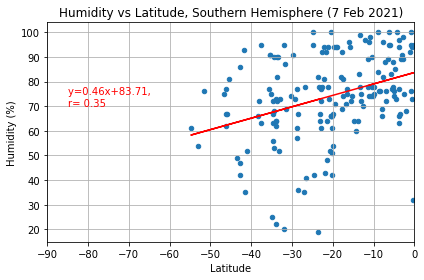

Humidity and latitude have a weaker but vistible correlation in the Northern Hemisphere (winter).
The farther north you go, the higher the humidity tends to be.  This makes some sense as more arid 
regions like the American Southwest and Middle East are located just north of the equator, and 
maintain dry conditions year-round.  In the Southern Hemisphere (summer) there is effectively no
correlation between humidity and latitude.  Again, parts of Australia are relatively dry, but the
continent is located farther south from the equator.  Many regions in Africa and South America 
near the equator have lots of forests and vegetation, which woudld contribute to the humidity


In [35]:
weatherNH.plot(kind='scatter',y='Humidity',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.xlim(0,90)
plt.title('Humidity vs Latitude, Northern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherNH['Lat'], weatherNH['Humidity'])
fit = slope * weatherNH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(60,25),fontsize=10,color="red",xytext=(65,25))
plt.plot(weatherNH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","HumidityVsLatNH.png"),facecolor='white', transparent=False)
plt.show()

weatherSH.plot(kind='scatter',y='Humidity',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.xlim(-90,0)
plt.title('Humidity vs Latitude, Southern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherSH['Lat'], weatherSH['Humidity'])
fit = slope * weatherSH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(-85,70),fontsize=10,color="red",xytext=(-85,70))
plt.plot(weatherSH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","HumidityVsLatSH.png"),facecolor='white', transparent=False)
plt.show()
print(f"Humidity and latitude have a weaker but vistible correlation in the Northern Hemisphere (winter)."\
     f"\nThe farther north you go, the higher the humidity tends to be.  This makes some sense as more arid "\
     f"\nregions like the American Southwest and Middle East are located just north of the equator, and "\
     f"\nmaintain dry conditions year-round.  In the Southern Hemisphere (summer) there is effectively no"\
     f"\ncorrelation between humidity and latitude.  Again, parts of Australia are relatively dry, but the"\
     f"\ncontinent is located farther south from the equator.  Many regions in Africa and South America "\
     f"\nnear the equator have lots of forests and vegetation, which woudld contribute to the humidity"\
     f"")

### Northern and Southern Hemispheres: Cloud Cover (%)

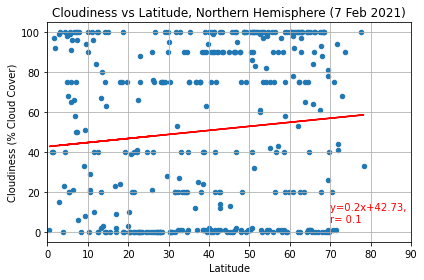

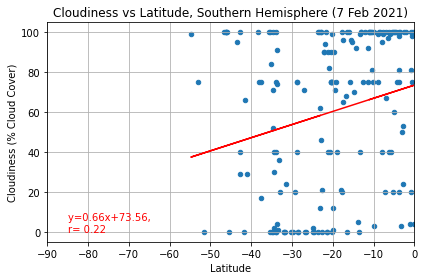

In the Northern Hemisphere, the linear regression suggests that cloud cover increases with latitude.
However, the correlation coefficient is only 0.25, so this is not a strong correllation.
In the Southern Hemisphere, the correlation suggests that cloud cover increases with latitude.  However
there are fewere degres of latitude with data in the Southern Hemisphere (about 40) compared to those in
the Northern Hemisphere (about 60).  The shorter span of latitudes may be artificially driving the weak
correlation.


In [41]:
weatherNH.plot(kind='scatter',y='Cloudiness',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Cloudiness (% Cloud Cover)')
plt.xlabel('Latitude')
plt.xlim(0,90)
plt.title('Cloudiness vs Latitude, Northern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherNH['Lat'], weatherNH['Cloudiness'])
fit = slope * weatherNH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(70,5),fontsize=10,color="red",xytext=(70,5))
plt.plot(weatherNH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","CloudsVsLatNH.png"),facecolor='white', transparent=False)
plt.show()

weatherSH.plot(kind='scatter',y='Cloudiness',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Cloudiness (% Cloud Cover)')
plt.xlabel('Latitude')
plt.xlim(-90,0)
plt.title('Cloudiness vs Latitude, Southern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherSH['Lat'], weatherSH['Cloudiness'])
fit = slope * weatherSH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(-90,0),fontsize=10,color="red",xytext=(-85,0))
plt.plot(weatherSH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","CloudsVsLatSH.png"),facecolor='white', transparent=False)
plt.show()
print(f"In the Northern Hemisphere, the linear regression suggests that cloud cover increases with latitude."\
     f"\nHowever, the correlation coefficient is only 0.25, so this is not a strong correllation."\
     f"\nIn the Southern Hemisphere, the correlation suggests that cloud cover increases with latitude.  However"\
     f"\nthere are fewere degres of latitude with data in the Southern Hemisphere (about 40) compared to those in"\
     f"\nthe Northern Hemisphere (about 60).  The shorter span of latitudes may be artificially driving the weak"\
     f"\ncorrelation.")

### Northern and Southern Hemispheres: Wind Speed (mph)

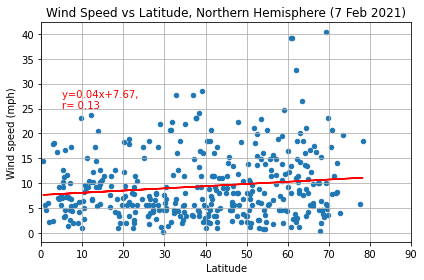

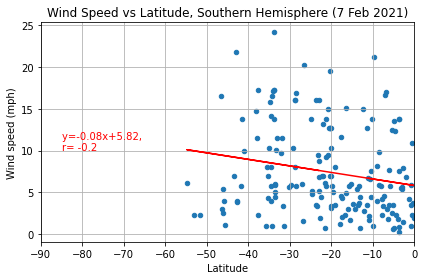

Wind speed vs. latitude has essentially no correlation in both the Northern and Southern Hemisphere.
There is a very small correlation suggesting that wind speed increases with latitude in the Northern
Hemisphere, but the correlation is very close to 0, so this relationship is very weak.  It is also
possible that the weather patterns at time of the data collection do not suggest a correlation; looking
at a wider timeframe of data for each hemisphere may provide more insight on whether wind speed has a 
correlation with latitude.


In [42]:
weatherNH.plot(kind='scatter',y='Windspeed',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Wind speed (mph)')
plt.xlabel('Latitude')
plt.xlim(0,90)
plt.title('Wind Speed vs Latitude, Northern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherNH['Lat'], weatherNH['Windspeed'])
fit = slope * weatherNH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(5,25),fontsize=10,color="red",xytext=(5,25))
plt.plot(weatherNH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","WindspeedVsLatNH.png"),facecolor='white', transparent=False)
plt.show()


weatherSH.plot(kind='scatter',y='Windspeed',x='Lat')
plt.grid(b=True,which='major',axis='both')
plt.ylabel('Wind speed (mph)')
plt.xlabel('Latitude')
plt.xlim(-90,0)
plt.title('Wind Speed vs Latitude, Southern Hemisphere (7 Feb 2021)')
slope, y_int, r, p, std_err = stats.linregress(weatherSH['Lat'], weatherSH['Windspeed'])
fit = slope * weatherSH['Lat'] + y_int
line_eq=f'y={round(slope,2)}x+{round(y_int,2)}, \nr= {round(r,2)}'
plt.annotate(line_eq,(-85,10),fontsize=10,color="red",xytext=(-85,10))
plt.plot(weatherSH['Lat'],fit,"-",color='red')
plt.tight_layout()
plt.savefig(os.path.join("Output","WindspeedVsLatSH.png"),facecolor='white', transparent=False)
plt.show()
print(f"Wind speed vs. latitude has essentially no correlation in both the Northern and Southern Hemisphere."\
     f"\nThere is a very small correlation suggesting that wind speed increases with latitude in the Northern"\
     f"\nHemisphere, but the correlation is very close to 0, so this relationship is very weak.  It is also"\
     f"\npossible that the weather patterns at time of the data collection do not suggest a correlation; looking"\
     f"\nat a wider timeframe of data for each hemisphere may provide more insight on whether wind speed has a "\
     f"\ncorrelation with latitude.")